<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/RNN_lstm_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

In [53]:
df=pd.read_csv("/content/combine1_data.csv")

In [54]:
pd.set_option('display.max_columns',None)

In [55]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15 23:57:20,341.0,2005-06-24 23:46:20,1.0,7.99,17503.0,2007-02-15 22:25:46.996577,161.0,Harvey,Hope,English


In [56]:
df1=df[["rental_date","category_id","rating","inventory_id","store_id","customer_id","actor_id"]]

In [57]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15 23:57:20,11.0,R,3419.0,1.0,341.0,161.0


In [58]:
df1["rental_date"] = pd.to_datetime(df1["rental_date"]).dt.strftime('%Y-%m-%d')


<ipython-input-58-aff0d650287d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["rental_date"] = pd.to_datetime(df1["rental_date"]).dt.strftime('%Y-%m-%d')


In [59]:
df1.isnull().sum()

,0
rental_date,231
category_id,5
rating,5
inventory_id,221
store_id,221
customer_id,231
actor_id,45


In [60]:
df1.dropna(inplace=True)

<ipython-input-60-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [61]:
df1.duplicated().sum()

24

In [62]:
df1.drop_duplicates(inplace=True)

<ipython-input-62-1788250b656d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [63]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15,11.0,R,3419.0,1.0,341.0,161.0


In [64]:
df1["rating"].unique()

array(['R', 'PG', 'G', 'PG-13', 'NC-17'], dtype=object)

In [65]:
assign={"G":1,"PG":2,"PG-13":3,"R":4,"NC-17":5}

In [66]:
df1["rating"]=df1["rating"].map(assign)

<ipython-input-66-d1f778fc82e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["rating"]=df1["rating"].map(assign)


In [67]:
df1.head(1)

,rental_date,category_id,rating,inventory_id,store_id,customer_id,actor_id
0,2005-06-15,11.0,4,3419.0,1.0,341.0,161.0


In [68]:
train_dates=df1["rental_date"]

In [69]:
train_dates.head(1)

,rental_date
0,2005-06-15


In [70]:
# Assuming train_dates is a Series
train_dates_df = train_dates.to_frame()

# Optionally, rename the column if needed
train_dates_df.columns = ['rental_date']



In [71]:
train_dates_df['rental_date'] = pd.to_datetime(train_dates_df['rental_date'], format='%Y-%m-%d')


In [72]:
train_dates_df

,rental_date
0,2005-06-15
1,2005-06-15
2,2005-06-15
3,2005-06-15
4,2005-06-15
...,...
88265,2005-05-30
88266,2005-05-30
88267,2005-05-30
88268,2005-05-30


In [73]:
df1.shape

(87980, 7)

In [74]:
cols=list(df1)[1:6]

In [75]:
df1_for_training=df1[cols]

In [76]:
df1_for_training

,category_id,rating,inventory_id,store_id,customer_id
0,11.0,4,3419.0,1.0,341.0
1,11.0,4,3419.0,1.0,341.0
2,11.0,4,3419.0,1.0,341.0
3,11.0,4,3419.0,1.0,341.0
4,11.0,4,3419.0,1.0,341.0
...,...,...,...,...,...
88265,1.0,1,4427.0,1.0,85.0
88266,1.0,1,4427.0,1.0,85.0
88267,1.0,1,4427.0,1.0,85.0
88268,1.0,1,4427.0,1.0,85.0


In [77]:
df1_for_training.category_id.unique()

array([11.,  6., 13.,  4., 10., 14.,  9.,  8., 16., 12., 15.,  5.,  7.,
        1.,  3.,  2.])

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
scaler=scaler.fit(df1_for_training)
df1_for_training_scaled=scaler.transform(df1_for_training)

In [80]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense
from matplotlib import pyplot as plt
import seaborn as sns

In [81]:
df1_for_training_scaled

array([[ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       [ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       [ 0.56613029,  0.69930517,  0.84954053, -1.01708154,  0.25435651],
       ...,
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946],
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946],
       [-1.56143178, -1.47152232,  1.61244298, -1.01708154, -1.23183946]])

In [82]:
trainX=[]
trainY=[]

In [83]:
trainY

[]

In [84]:
n_future=1
n_past=14

In [85]:
for i in range(n_past,len(df1_for_training_scaled)-n_future+1):
  trainX.append(df1_for_training_scaled[i-n_past:i,0:df1_for_training.shape[1]])
  trainY.append(df1_for_training_scaled[i+n_future-1:i+n_future,0])

trainX,trainY=np.array(trainX),np.array(trainY)

print("trainX shape =={}.".format(trainX.shape))
print("trainY shape =={}.".format(trainY.shape))

trainX shape ==(87966, 14, 5).
trainY shape ==(87966, 1).


In [86]:
trainX.shape

(87966, 14, 5)

In [87]:
model=Sequential()
model.add(LSTM(64,activation="relu",input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(32,activation="relu",return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer="adam",loss="mse")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 14, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
result=model.fit(trainX,trainY,epochs=50,validation_split=.02,batch_size=300,verbose=1)

Epoch 1/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 0.5489 - val_loss: 0.3065
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 0.3269 - val_loss: 0.3005
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.3254 - val_loss: 0.2984
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.3120 - val_loss: 0.3030
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.3215 - val_loss: 0.2968
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - loss: 0.3189 - val_loss: 0.2952
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.3176 - val_loss: 0.3000
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.3145 - val_loss: 0.2953
Epoch 9/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.3111 - val_loss: 0.2935
Epoch 10/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - loss: 0.3112 - val_loss: 0.2951
Epoch 11/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 0.3124 - val_loss: 0.2907
Epoch 12/50
288/288 ━━━━━━━━━━

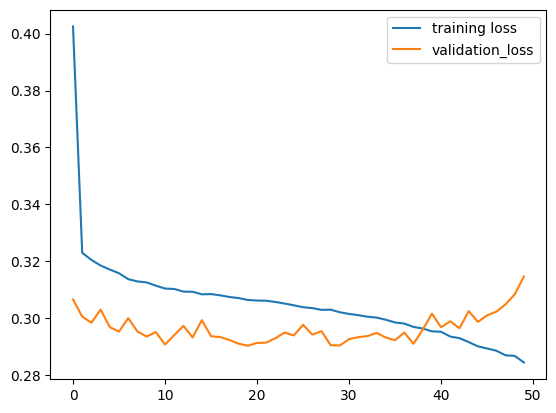

In [89]:
plt.plot(result.history["loss"],label="training loss")
plt.plot(result.history["val_loss"],label="validation_loss")
plt.legend()

In [90]:
n_future=30
forecast_period_dates=pd.date_range(list(train_dates)[-1],periods=n_future,freq='1d').tolist()

In [91]:
forecast=model.predict(trainX[-n_future:])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [92]:
forecast_copies=np.repeat(forecast,df1_for_training.shape[1],axis=-1)
y_pred_future=scaler.inverse_transform(forecast_copies)[:,0]

In [93]:
y_pred_future[:5]

array([ 7.5616603,  7.733027 ,  7.8922873,  8.209045 , 16.485594 ],
      dtype=float32)

In [94]:
y_pred_full_numbers = np.round(y_pred_future).astype(int)

# Convert to DataFrame
df_pred = pd.DataFrame(y_pred_full_numbers, columns=['Predicted Values'])
df_pred[:5]

,Predicted Values
0,8
1,8
2,8
3,8
4,16
